# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPool1D
from tensorflow.keras.optimizers import Adam

from events_to_pd import events_to_pd
from gen_feats import gen_feats

# Load data

In [2]:
%%time
bkg_path = "bb1/run_a0.txt"
sig_path = "dark1/run_a0.txt"
bkg_path_test = "bb2/run_a0.txt"
sig_path_test = "dark2/run_a0.txt"

max_ev = int(1e3)

bkg, bkg_j = events_to_pd(bkg_path,max_ev)
sig, sig_j = events_to_pd(sig_path,max_ev)
bkg_test, bkg_j_test = events_to_pd(bkg_path_test,max_ev)
sig_test, sig_j_test = events_to_pd(sig_path_test,max_ev)

print("num Background train jets = {}".format(len(bkg_j)))
print("num Signal train jets = {}".format(len(sig_j)))
print("num Background test jets = {}".format(len(bkg_j_test)))
print("num Signal test jets = {}".format(len(sig_j_test)))

num Background train jets = 521
num Signal train jets = 432
num Background test jets = 467
num Signal test jets = 399
Wall time: 2.14 s


In [4]:
%%time
bkg = pd.read_pickle("data/bkg")
bkg_j = pd.read_pickle("data/bkg_j")
sig = pd.read_pickle("data/sig")
sig_j = pd.read_pickle("data/sig_j")
bkg_test = pd.read_pickle("data/bkg_test")
bkg_j_test = pd.read_pickle("data/bkg_j_test")
sig_test = pd.read_pickle("data/sig_test")
sig_j_test = pd.read_pickle("data/sig_j_test")
print("num Background train jets = {}".format(len(bkg_j)))
print("num Signal train jets = {}".format(len(sig_j)))
print("num Background test jets = {}".format(len(bkg_j_test)))
print("num Signal test jets = {}".format(len(sig_j_test)))

num Background train jets = 30215
num Signal train jets = 23671
num Background test jets = 29767
num Signal test jets = 23671
Wall time: 7.12 s


# Create features

In [3]:
%%time
n_constits = 20

bkg, bkg_j = gen_feats(bkg, bkg_j, n_constits=n_constits, label=0, boost_and_shift=True, sort="absD0")
sig, sig_j = gen_feats(sig, sig_j, n_constits=n_constits, label=1, boost_and_shift=True, sort="absD0")

bkg_test, bkg_j_test = gen_feats(bkg_test, bkg_j_test, n_constits=n_constits, label=0, boost_and_shift=True, sort="absD0")
sig_test, sig_j_test = gen_feats(sig_test, sig_j_test, n_constits=n_constits, label=1, boost_and_shift=True, sort="absD0")

Wall time: 4.84 s


In [16]:
%%time
bkg.to_pickle("feats_boost_D0_20/bkg")
bkg_j.to_pickle("feats_boost_D0_20/bkg_j")
sig.to_pickle("feats_boost_D0_20/sig")
sig_j.to_pickle("feats_boost_D0_20/sig_j")
bkg_test.to_pickle("feats_boost_D0_20/bkg_test")
bkg_j_test.to_pickle("feats_boost_D0_20/bkg_j_test")
sig_test.to_pickle("feats_boost_D0_20/sig_test")
sig_j_test.to_pickle("feats_boost_D0_20/sig_j_test")

Wall time: 1min 19s


In [6]:
%%time
bkg = pd.read_pickle("feats_boost_D0_20/bkg")
bkg_j = pd.read_pickle("feats_boost_D0_20/bkg_j")
sig = pd.read_pickle("feats_boost_D0_20/sig")
sig_j = pd.read_pickle("feats_boost_D0_20/sig_j")
bkg_test = pd.read_pickle("feats_boost_D0_20/bkg_test")
bkg_j_test = pd.read_pickle("feats_boost_D0_20/bkg_j_test")
sig_test = pd.read_pickle("feats_boost_D0_20/sig_test")
sig_j_test = pd.read_pickle("feats_boost_D0_20/sig_j_test")

Wall time: 8.78 s


In [9]:
len(bkg_j["PT_track"][0])

20

In [24]:
bkg_j[feats].head()

,PT_track,Eta_track,Phi_track,D0_track,DZ_track
0,"[0.21326736182357442, 0.44115540301068856, 0.2...","[-0.2111423381430579, -0.1873222058470713, 0.6...","[0.8785490931832391, 0.07367104440275156, -0.2...","[1.0, -0.32503982222571826, 0.3054846512359638...","[1.0, 0.06377011582126066, 0.12829880356255494..."
1,"[0.01967833177702013, 0.08595952137940022, 0.0...","[1.0, 0.1888977635782749, -0.08548322683706067...","[0.28509905254091256, -1.3415159345391914, -1....","[-4.401288036447494, 1.0, -0.01087983013667810...","[-3.9589674692640875, 1.0, 0.00078163682291776..."
2,"[0.014811161704948268, 0.04968466910669856, 0....","[1.0, 0.9065650062207778, 0.026772921661727424...","[-1.4631936579841371, 0.38896324513538555, -0....","[1.0, -0.2984692675407244, -0.0003779032200093...","[1.0, 0.4232220002787197, -0.00234070005109862..."
3,"[0.08471577147072436, 0.08904127932791588, 0.0...","[-0.09686752516218933, 0.050413598840988505, -...","[-0.4091723301472261, -0.08037076493137428, -0...","[-1.013545699333272, 1.0, 0.7886146981743004, ...","[-0.18104998059697947, -1.3569669288808588, -0..."
4,"[0.35745629050006117, 0.6291478175816115, 0.75...","[-0.004881583286499224, -0.002317707002819332,...","[0.15013174734623203, 0.1412632688398706, 0.10...","[-1.712161819564666, 1.0, -0.06075416802482102...","[0.6214426727410782, -1.515322703113136, 0.242..."


# CNN classifier track

## Train/Validation split

In [22]:
%%time
n_constits = len(bkg_j["PT_track"][0])

feats = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"]

val_frac = 0.2

data = pd.concat([sig_j,bkg_j.loc[range(sig_j.shape[0])]]).sample(frac=1).reset_index()

train_ind = np.arange(0,int(len(data)*(1-val_frac))) 
val_ind = np.arange(int(len(data)*(1-val_frac)),len(data))

X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]

X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]

X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))

print("num total examples = {}".format(len(data)))
print("num train examples = {}".format(len(train_ind)))
print("num validation examples = {}".format(len(val_ind)))
print("X_train shape = {}".format(X_train.shape))

num total examples = 826
num train examples = 660
num validation examples = 166
X_train shape = (660, 20, 5)
Wall time: 36.9 ms


In [13]:
data.columns

Index(['index', 'Event', 'Jet', 'PT', 'Eta', 'Phi', 'MET', 'mult_track',
       'mult_tower_had', 'mult_tower_em', 'avgDeltaR', 'PT_track', 'Eta_track',
       'Phi_track', 'DeltaR_track', 'D0_track', 'DZ_track', 'PT_tower_had',
       'Eta_tower_had', 'Phi_tower_had', 'DeltaR_tower_had', 'Ehad_tower_had',
       'Eem_tower_had', 'PT_tower_em', 'Eta_tower_em', 'Phi_tower_em',
       'DeltaR_tower_em', 'Ehad_tower_em', 'Eem_tower_em', 'maxD0', 'maxDZ',
       'label'],
      dtype='object')

In [6]:
X_train.shape

(41062, 30, 5)

## Model

In [23]:
#Define model
model = Sequential()
model.add(Conv1D(128, 3, padding='same', activation='relu', input_shape=(n_constits,len(feats))))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(16, activation='relu')) 
model.add(Dense(16, activation='relu'))  
model.add(Dense(1, activation='sigmoid')) 

#Compile
sgd = Adam(learning_rate=0.001)
model.compile(sgd,loss='binary_crossentropy')
model.summary()

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_track_WandB', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, verbose=1, mode="auto", baseline=None, restore_best_weights=False) 

#Train model
train_history = model.fit(X_train, y_train, batch_size=1000, epochs=100, validation_data=(X_val,y_val), callbacks=[checkpoint, es])

#Load best weights
model = tf.keras.models.load_model("cnn_track_WandB")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 128)           2048      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 20, 64)            24640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 10, 32)            6176      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 32)            3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 32)           

## Evaluate

sig_eff=0.12527114967462039
bkg_eff=0.010467980295566502
Wall time: 1.69 s


(array([ 29.,  52., 293., 289., 245., 296., 420., 360., 816., 888.]),
 array([1.6940506e-15, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

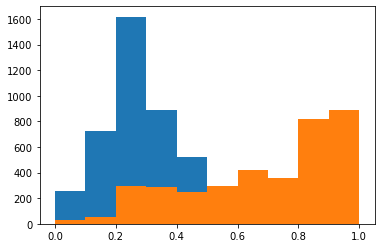

In [16]:
%%time
#Load best weights
model = tf.keras.models.load_model("cnn_track_WandB")
thresh = 0.93

bkg_preds = model.predict(X_test_B).flatten()
sig_preds = model.predict(X_test_S).flatten()
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);

c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Wall time: 731 ms


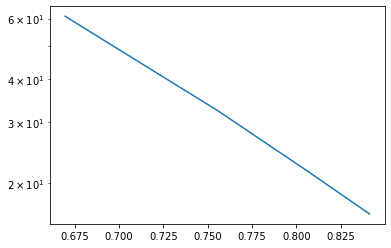

In [9]:
%%time
sig_eff = []
bkg_eff = []
frac = []
for thresh in (1-np.arange(0.001,0.5,0.1)):
    bkg_eff_temp = sum(bkg_preds>thresh)/len(bkg_preds)
    sig_eff_temp = sum(sig_preds>thresh)/len(sig_preds)
    sig_eff.append(sig_eff_temp)
    bkg_eff.append(1/bkg_eff_temp)
plt.semilogy(sig_eff,bkg_eff)    

# CNN classifier tower hadrons

## Train/Validation split

In [10]:
%%time
feats = ["PT_tower_had", "Eta_tower_had", "Phi_tower_had"]

val_frac = 0.2

data = pd.concat([sig_j,bkg_j]).sample(frac=1).reset_index()

train_ind = np.arange(0,int(len(data)*(1-val_frac))) 
val_ind = np.arange(int(len(data)*(1-val_frac)),len(data))


X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]

X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]

X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))

print("num total examples = {}".format(len(data)))
print("num train examples = {}".format(len(train_ind)))
print("num validation examples = {}".format(len(val_ind)))

num total examples = 51328
num train examples = 41062
num validation examples = 10266
Wall time: 660 ms


In [11]:
data.head()

,index,Event,Jet,PT,Eta,Phi,MET,mult_track,mult_tower_had,mult_tower_em,...,Eem_tower_had,PT_tower_em,Eta_tower_em,Phi_tower_em,DeltaR_tower_em,Ehad_tower_em,Eem_tower_em,maxD0,maxDZ,label
0,19199,39800,1,157.812,0.572917,2.538700,5.88029,17,5,11,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.037157820698045775, 0.03345601094973766, 0....","[-0.07847300000000001, 0.065492, -0.179431, 0....","[0.08308000000000026, 0.032440000000000246, -0...","[0.114283, 0.0730875, 0.253099, 0.0808513, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.59546, 6.39273, 3.93903, 4.24762, 3.49348, ...",-0.485217,-0.033199,0
1,17760,36859,1,157.926,2.633520,-2.741530,23.08040,2,10,11,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.042924597596342595, 0.021189671111786535, 0...","[-0.06482999999999972, -0.04803999999999986, 0...","[-0.03345999999999982, -0.04529000000000005, -...","[0.0729598, 0.066027, 0.322124, 0.323252, 0.11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[44.4876, 22.3289, 17.762, 9.5297, 7.30592, 6....",-0.213740,-0.601032,0
2,24168,49886,2,147.554,0.098754,-0.937863,12.49690,13,3,15,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.048412513384930266, 0.045886251812895615, 0...","[-0.0403426, -0.006357199999999993, 0.00864729...","[-0.04094900000000001, -0.0009010000000000407,...","[0.0574833, 0.00642064, 0.00876343, 0.110768, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.15565, 6.79962, 6.5552, 5.18403, 3.80601, 3...",0.017365,-0.005344,0
3,22695,46814,1,145.545,0.151856,-2.654430,45.24300,8,2,13,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.03849070734137209, 0.029995534027276793, 0....","[-0.007733999999999991, 0.022835999999999995, ...","[-0.050819999999999865, -0.08240999999999987, ...","[0.0514067, 0.0855192, 0.122162, 0.0607573, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.66041, 4.43249, 3.41311, 3.18744, 2.86733, ...",0.005843,0.104543,0
4,15729,32604,1,150.806,-1.562010,-0.307282,24.45690,11,7,11,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06656167526490989, 0.049672360516159836, 0....","[0.01028999999999991, 0.012969999999999926, -0...","[-0.03426800000000002, -0.067195, -0.058111000...","[0.0357786, 0.0684351, 0.0595394, 0.0423784, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[24.7507, 18.4253, 18.855, 10.7918, 9.00991, 5...",1.325710,-0.460351,0


## Model

In [12]:
#Define model
model = Sequential()
model.add(Conv1D(128, 3, padding='same', activation='elu', input_shape=(n_constits,len(feats))))
model.add(Conv1D(64, 3, padding='same', activation='elu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Conv1D(32, 3, padding='same', activation='elu'))
model.add(Conv1D(32, 3, padding='same', activation='elu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(16, activation='elu')) 
model.add(Dense(16, activation='elu'))  
model.add(Dense(1, activation='sigmoid')) 

#Compile
sgd = Adam(learning_rate=0.001)
model.compile(sgd,loss='binary_crossentropy')
model.summary()

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_towerhad_WandB', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, verbose=1, mode="auto", baseline=None, restore_best_weights=False) 

#Train model
train_history = model.fit(X_train, y_train, batch_size=1000, epochs=100, validation_data=(X_val,y_val), callbacks=[checkpoint, es])

#Load best weights
model = tf.keras.models.load_model("cnn_towerhad_WandB")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 30, 128)           1280      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 30, 64)            24640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 15, 32)            6176      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 32)           

## Evaluate

sig_eff=0.313324896040499
bkg_eff=0.004358893887087213
Wall time: 4.83 s


(array([  854.,   690.,   681.,   698.,   782.,  1027.,  1320.,  1864.,
         3401., 10807.]),
 array([0.00468984, 0.10416879, 0.20364773, 0.3031267 , 0.40260562,
        0.50208455, 0.6015635 , 0.7010425 , 0.8005214 , 0.90000033,
        0.9994793 ], dtype=float32),
 <BarContainer object of 10 artists>)

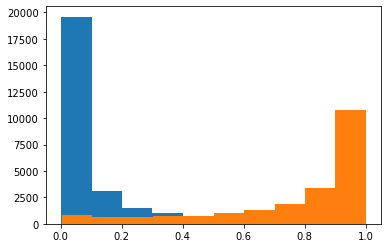

In [13]:
%%time
#Load best weights
model = tf.keras.models.load_model("cnn_towerhad_WandB")
thresh = 0.955

bkg_preds = model.predict(X_test_B).flatten()
sig_preds = model.predict(X_test_S).flatten()
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);

c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Wall time: 755 ms


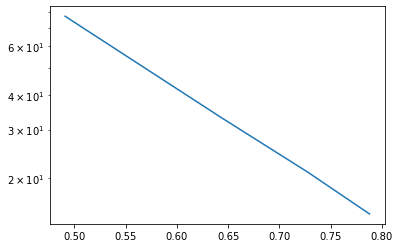

In [14]:
%%time
sig_eff = []
bkg_eff = []
frac = []
for thresh in (1-np.arange(0.001,0.5,0.1)):
    bkg_eff_temp = sum(bkg_preds>thresh)/len(bkg_preds)
    sig_eff_temp = sum(sig_preds>thresh)/len(sig_preds)
    sig_eff.append(sig_eff_temp)
    bkg_eff.append(1/bkg_eff_temp)
plt.semilogy(sig_eff,bkg_eff)    

# CNN classifier tower EM

## Train/Validation split

In [15]:
%%time
feats = ["PT_tower_em", "Eta_tower_em", "Phi_tower_em"]

val_frac = 0.2

data = pd.concat([sig_j,bkg_j]).sample(frac=1).reset_index()

train_ind = np.arange(0,int(len(data)*(1-val_frac))) 
val_ind = np.arange(int(len(data)*(1-val_frac)),len(data))


X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]

X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]

X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))

print("num total examples = {}".format(len(data)))
print("num train examples = {}".format(len(train_ind)))
print("num validation examples = {}".format(len(val_ind)))

num total examples = 51328
num train examples = 41062
num validation examples = 10266
Wall time: 562 ms


In [16]:
X_train.shape

(41062, 30, 3)

## Model

In [17]:
#Define model
model = Sequential()
model.add(Conv1D(128, 3, padding='same', activation='elu', input_shape=(n_constits,len(feats))))
model.add(Conv1D(64, 3, padding='same', activation='elu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Conv1D(32, 3, padding='same', activation='elu'))
model.add(Conv1D(32, 3, padding='same', activation='elu'))
model.add(Dropout(0.1))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(16, activation='elu')) 
model.add(Dense(16, activation='elu'))  
model.add(Dense(1, activation='sigmoid')) 

#Compile
sgd = Adam(learning_rate=0.001)
model.compile(sgd,loss='binary_crossentropy')
model.summary()

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_towerem_WandB', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, verbose=1, mode="auto", baseline=None, restore_best_weights=False) 

#Train model
train_history = model.fit(X_train, y_train, batch_size=1000, epochs=100, validation_data=(X_val,y_val), callbacks=[checkpoint, es])

#Load best weights
model = tf.keras.models.load_model("cnn_towerem_WandB")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 30, 128)           1280      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 30, 64)            24640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 15, 32)            6176      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 32)           

## Evaluate

sig_eff=0.3193364671849575
bkg_eff=0.007671653241273495
Wall time: 5.54 s


(array([  885.,   763.,   721.,   810.,   937.,  1101.,  1358.,  1830.,
         3029., 10690.]),
 array([0.00242707, 0.10202405, 0.20162103, 0.301218  , 0.40081498,
        0.500412  , 0.60000896, 0.69960594, 0.7992029 , 0.8987999 ,
        0.9983969 ], dtype=float32),
 <BarContainer object of 10 artists>)

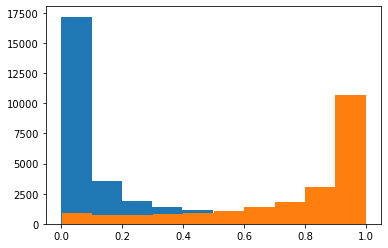

In [18]:
%%time
thresh = 0.955
#Load best weights
model = tf.keras.models.load_model("cnn_towerem_WandB")

bkg_preds = model.predict(X_test_B).flatten()
sig_preds = model.predict(X_test_S).flatten()
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);

Wall time: 7.23 s


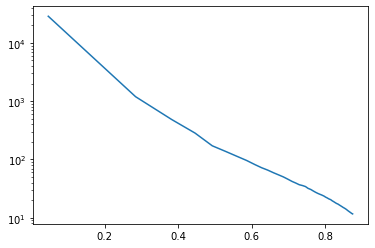

In [18]:
%%time
sig_eff = []
bkg_eff = []
frac = []
for thresh in (1-np.arange(0.001,0.5,0.1)):
    bkg_eff_temp = sum(bkg_preds>thresh)/len(bkg_preds)
    sig_eff_temp = sum(sig_preds>thresh)/len(sig_preds)
    sig_eff.append(sig_eff_temp)
    bkg_eff.append(1/bkg_eff_temp)
plt.semilogy(sig_eff,bkg_eff)    